# (Loan Dataset Exploration)
## by (Saud BinGhushayan)

## Preliminary Wrangling

> In this dataset I'm going to investigate the loans nature , what loans are for , whats the relation between the monthly payments associated with loan amount and also whats the status of loans 

> Since the dataset is too large and I only need specific columns on my analysis I'll do some wrangling work 
I skipped the assess part of the wrangling process since our main focus here is about the visualization, I assessed the data visually to know the columns that I need and also I assessed it programmitacly , there are alot of quality and tidiness issues I only performed what's needed in the visualization 

__for Info on the columns in this dataset please [click here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)__

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os 

%matplotlib inline

#Setting the background of the plots
sb.set_style('darkgrid')

#Setting colors to each exploration part 
base_color_for_univariate = sb.color_palette()[0]
base_color_for_bivariate = sb.color_palette()[3]
base_color_for_mutlivariate = sb.color_palette()[2]

##### Gathering the data 

In [3]:
#Reading the csv file and store it in loan dataframe
loan = pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Cleaning :
This dataset has 81 column and in this project we don't need them all so I'm going to do some cleaning efforts first

### Quality issues :
- Change data types of the following columns (ListingNumber , Term , ProsperScore) to objects 
- Change `ListingCategory (numeric)` to objects 
- Remove the ` (numeric / Alpha)` from the columns that has them
- change Data type of (ListingCreationDate , LoanOriginationDate) from `object` to `datetime` 
### Tidiness issues :
- Delete rows that are before july - 2009
- Delete all columns except the following (ListingKey , ListingNumber , ListingCreationDate , Term , LoanStatus  , BorrowerAPR , BorrowerRate , LenderYield , ProsperRating (numeric) , ProsperRating (Alpha) , ProsperScore , ListingCategory , Occupation , EmploymentStatus , LoanOriginalAmount , LoanOriginationDate , MonthlyLoanPayment and ProsperRating (numeric))


### Before Cleaining I'm going to take a copy of the original dataset and store it in `loan_clean`

In [4]:
loan_clean = loan.copy()

#### now let's start with the Quality issues first

##### 1. Change data types of the following columns (ListingNumber , Term , ProsperScore) to objects

##### Define

I'm going to change the types of the selected columns by using `.astype` pandas function

##### Code

In [5]:
loan_clean.ListingNumber = loan_clean.ListingNumber.astype(str)
loan_clean.Term = loan_clean.Term.astype(str)
loan_clean.ProsperScore = loan_clean.ProsperScore.astype(str)

##### Test

In [6]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  object 
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  object 
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

##### 2. `Quality` Change ListingCategory (numeric) to objects

##### Define

`ListingCategory` column should be object and unfortunately this dataset does not provide an object version of this column __to demonstrate what I mean Look below__

In [7]:
loan_clean['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12])

The following number means : 
- 0 : Not Available 
- 1 : Debt Consolidation 
- 2 : Home Improvement 
- 3 : Business
- 4 : Personal Loan
- 5 : Student Use
- 6 : Auto
- 7 : Other
- 8 : Baby&Adoption
- 9 : Boat
- 10: Cosmetic Procedure,
- 11: Engagement Ring,
- 12: Green Loans,
- 13: Household Expenses,
- 14: Large Purchases,
- 15: Medical/Dental,
- 16: Motorcycle,
- 17: RV,
- 18: Taxes,
- 19: Vacation
- 20: Wedding Loans

##### Code

In [8]:
#First I'm going to change the type to object
loan_clean['ListingCategory (numeric)'] = loan_clean['ListingCategory (numeric)'].astype(object)

#Specifiying the numbers as dictionary keys
change_list = { 0 : 'Not Available',
                1 : 'Debt Consolidation',
                2 : 'Home Improvement',
                3 : 'Business',
                4 : 'Personal Loan',
                5 : 'Student Use',
                6 : 'Auto',
                7 : 'Other',
                8 : 'Baby&Adoption',
                9 : 'Boat',
                10: 'Cosmetic Procedure',
                11: 'Engagement Ring',
                12: 'Green Loans',
                13: 'Household Expenses',
                14: 'Large Purchases',
                15: 'Medical/Dental',
                16: 'Motorcycle',
                17: 'RV',
                18: 'Taxes',
                19: 'Vacation',
                20: 'Wedding Loans'}

# Iterating in the whole dictionry keys and using the .replace function to replace the key with it's value
for num in change_list.keys():
    loan_clean['ListingCategory (numeric)'].replace(num , change_list[num] , inplace = True)

##### Test

In [9]:
loan_clean['ListingCategory (numeric)'].unique()

array(['Not Available', 'Home Improvement', 'Motorcycle',
       'Debt Consolidation', 'Other', 'Household Expenses', 'Auto',
       'Medical/Dental', 'Wedding Loans', 'Vacation', 'Business', 'Taxes',
       'Baby&Adoption', 'Personal Loan', 'Engagement Ring',
       'Large Purchases', 'Student Use', 'Boat', 'RV',
       'Cosmetic Procedure', 'Green Loans'], dtype=object)

##### 3. `Quality` Remove the (numeric / Alpha) from the following columns ( 'ProsperRating (Alpha)' , 'ListingCategory (numeric)')  

##### Define 

I'm going to remove the spaces and (numeric / Alpha) in the columns that have them using `.rename` pandas function 
__NOTE__ : there are more than these columns that has `(Alpha) , (numeric) and (percentage)` but I only chose these three because thats what I'm going to need in the analysis and the other columns are going to be dropped 

##### Code

In [10]:
loan_clean.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory' ,
                             'ProsperRating (Alpha)' : 'ProsperRating'} , inplace = True)

##### Test

In [11]:
list(loan_clean)

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'CreditGrade',
 'Term',
 'LoanStatus',
 'ClosedDate',
 'BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperRating',
 'ProsperScore',
 'ListingCategory',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'EmploymentStatusDuration',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'GroupKey',
 'DateCreditPulled',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'FirstRecordedCreditLine',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingAccounts',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'Tra

##### 4.change Data type of (ListingCreationDate , LoanOriginationDate) from object to datetime

##### Define

I'm going to change these two columns from `object` to `datetime` using `.to_datetime` pandas function

##### Code

In [12]:
loan_clean['ListingCreationDate'] = pd.to_datetime(loan_clean['ListingCreationDate'])
loan_clean['LoanOriginationDate'] = pd.to_datetime(loan_clean['LoanOriginationDate'])

##### Test

In [13]:
loan_clean.ListingCreationDate.head() , loan_clean.LoanOriginationDate.head()

(0   2007-08-26 19:09:29.263
 1   2014-02-27 08:28:07.900
 2   2007-01-05 15:00:47.090
 3   2012-10-22 11:02:35.010
 4   2013-09-14 18:38:39.097
 Name: ListingCreationDate, dtype: datetime64[ns],
 0   2007-09-12
 1   2014-03-03
 2   2007-01-17
 3   2012-11-01
 4   2013-09-20
 Name: LoanOriginationDate, dtype: datetime64[ns])

__Now I'm going to fix the `Tidiness isuues` since it's confusing to look at the dataset with 81 columns__

##### 1.Delete rows that are before july - 2009

##### Define 

I'm going to delete all rows that are before july - 2009 since most of our variables have the condition __Applicable for loans originated after july 2009__  first I'm going to filter all rows that are before 2009 and then delete them by using their index in `.drop` pandas function

##### Code

In [14]:
#Filtering the rows
filter_before_2009 = loan_clean[loan_clean['ListingCreationDate'] <= '2009-06-30'].index

#Dropping the rows
loan_clean.drop(filter_before_2009 , inplace = True)

##### Test

In [15]:
loan_clean[loan_clean['ListingCreationDate'] <= '2009-06-30']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


##### 2. `Tidiness` Delete all columns except the following (ListingKey , ListingNumber , ListingCreationDate , Term , LoanStatus ,  BorrowerAPR , BorrowerRate , LenderYield , ProsperRating (numeric) , ProsperRating (Alpha) , ProsperScore , ListingCategory , Occupation , EmploymentStatus , LoanOriginalAmount , LoanOriginationDate and MonthlyLoanPayment)

##### Define

I'm going to drop all columns except the ones above by using `.drop` pandas function

##### Code

In [16]:
#Specifying the columns
columns = ['ListingKey' , 'ListingNumber' , 'ListingCreationDate' , 'Term' , 'LoanStatus' 
           , 'BorrowerAPR' , 'BorrowerRate' , 'LenderYield' , 'ProsperRating' 
           , 'ProsperScore' , 'ListingCategory' , 'Occupation' , 'EmploymentStatus' 
           , 'LoanOriginalAmount' , 'LoanOriginationDate' , 'MonthlyLoanPayment']
#Dropping the unneeded columns
loan_clean.drop(loan_clean.columns.difference(columns) , axis = 1 , inplace = True)

##### Test

In [17]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ListingKey           84853 non-null  object        
 1   ListingNumber        84853 non-null  object        
 2   ListingCreationDate  84853 non-null  datetime64[ns]
 3   Term                 84853 non-null  object        
 4   LoanStatus           84853 non-null  object        
 5   BorrowerAPR          84853 non-null  float64       
 6   BorrowerRate         84853 non-null  float64       
 7   LenderYield          84853 non-null  float64       
 8   ProsperRating        84853 non-null  object        
 9   ProsperScore         84853 non-null  object        
 10  ListingCategory      84853 non-null  object        
 11  Occupation           83520 non-null  object        
 12  EmploymentStatus     84853 non-null  object        
 13  LoanOriginalAmount   84853 non

##### Storing the data in a `csv` file

In [18]:
#Checking for file if not found create new one
if not os.path.exists('loan_clean.csv'):
    loan_clean.to_csv('loan_clean.csv', index= False)

#### Viewing the dataset after cleaning 

In [19]:
loan_clean.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,Occupation,EmploymentStatus,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,A,7.0,Home Improvement,Professional,Employed,10000,2014-03-03,318.93
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,A,9.0,Motorcycle,Skilled Labor,Employed,10000,2012-11-01,321.45
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,D,4.0,Home Improvement,Executive,Employed,15000,2013-09-20,563.97
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,0.1214,B,10.0,Debt Consolidation,Professional,Employed,15000,2013-12-24,342.37
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,0.2612,E,2.0,Debt Consolidation,Sales - Retail,Employed,3000,2013-04-18,122.67


### What is the structure of your dataset?

__After claning the dataset we now only have `16` columns with `84853` observations__

Columns Describtions :

- ListingKey : Unique key for each listing, same value as the 'key' used in the listing object in the API.     
- ListingNumber : The number that uniquely identifies the listing to the public as displayed on the website.   
- ListingCreationDate : The date the listing was created.
- Term :The length of the loan expressed in months.                         
- LoanStatus : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted,                              FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. 
- BorrowerAPR : The Borrower's Annual Percentage Rate (APR) for the loan.               
- BorrowerRate : The Borrower's interest rate for this loan.             
- LenderYield : The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the                       servicing fee.           
- ProsperRating : The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable                       for loans originated after July 2009.               
- ProsperScore : A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10                        being the best, or lowest risk score.  Applicable for loans originated after July 2009.       
- ListingCategory : The category of the listing that the borrower selected when posting their listing: 0 - Not                         Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5                         Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 -                         Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 -                             Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans   
- Occupation : The Occupation selected by the Borrower at the time they created the listing.          
- EmploymentStatus : The employment status of the borrower at the time they posted the listing.    
- LoanOriginalAmount : The origination amount of the loan.
- LoanOriginationDate : The date the loan was originated.  
- MonthlyLoanPayment : The scheduled monthly loan payment.

__NOTE__ : I got the describtion from [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)
### What is/are the main feature(s) of interest in your dataset?

- I'm looking at the loans nature and what's most loans are for 
- The APR associated with each loan status
- Does higher amount of loans have high Monthly Payments 
- What's the loan amount and the monthly payments for the top 10 `ListingCategory` 
- The LoanStatus and APR associated with the top 10 `ListingCtaegory`
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


- BorrowerAPR : this will help me to know the relation with the loan status 
- LoanStatus : I'm interested only with three loans status ('Completed' , 'Defaulted' , 'Current')
- LoanOriginalAmount : this will help me to know it's relation with MonthlyLoanPayment
- MonthlyLoanPayment : this will help me to know it's relation with LoanOriginalAmount
- ListingCategory : number of loans assosiated with each category 


## Univariate Exploration
 
1. First I'm going to look at the variables of interest in the dataset individually
2. I'm going to look at the ListingCategory column and ask the question : what are most loans for ? 

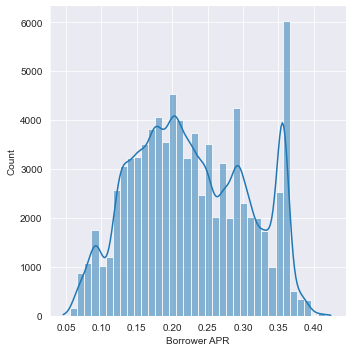

In [20]:
#plot BorrowerAPR histogram

#Specifying the bins
bins = np.arange(loan_clean.BorrowerAPR.min() , loan_clean.BorrowerAPR.max()+0.01 , 0.01)
#plotting the histogram with kde
sb.displot(data = loan_clean , x = 'BorrowerAPR' , bins = bins , kde = True , color = base_color_for_univariate)
#Specifying the x label
plt.xlabel('Borrower APR')
plt.show()

- This distribution looks `Normal Distribution` but have outliers and seems most loans have APR with the range between 0.15 and 0.30

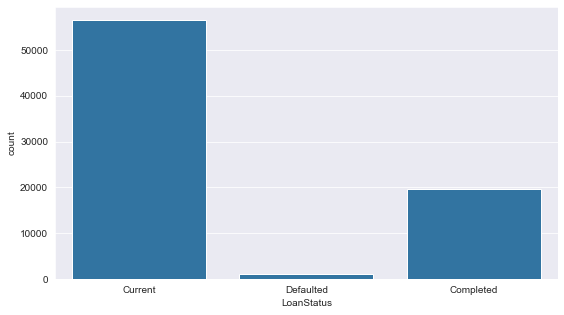

In [21]:
#Plot LoanStatus 

#Since we are interested in only three types so I'm going to select them only
status_values = ['Current' , 'Defaulted' , 'Completed']
loan_clean_status = loan_clean.loc[loan_clean.LoanStatus.isin(status_values)]

#Figure size
plt.figure(figsize = [9,5])
#Plotting the Countbar 
sb.countplot(data = loan_clean_status , x = 'LoanStatus' , color = base_color_for_univariate)
plt.show()

- We have little amount of loans that are defaulted we will see later what is the reason that they are defaulted 

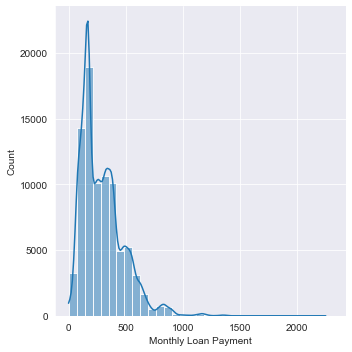

In [22]:
#plot MonthlyLoanPayment Histogram

#Specifying the bins 
bins = np.arange(loan_clean.MonthlyLoanPayment.min() , loan_clean.MonthlyLoanPayment.max()+70 , 70)

#Plot the histogram with kde 
sb.displot(data = loan_clean , x = 'MonthlyLoanPayment' , bins = bins , kde = True ,
           color = base_color_for_univariate)
plt.xlabel('Monthly Loan Payment')
plt.show()

- The above histogram looks like a `right-skewed distribution` and most monthly payments are between (200 and 400) 

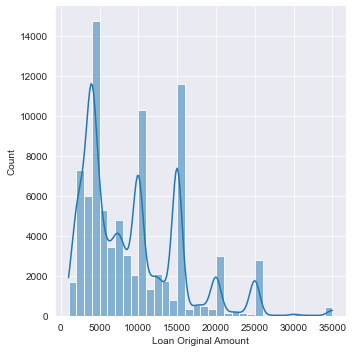

In [23]:
#Plot Loan amount Histogram

#Specifying the bins
bins = np.arange(loan_clean.LoanOriginalAmount.min() , loan_clean.LoanOriginalAmount.max()+1000 , 1000)

#Plot the histogram with kde
sb.displot(data = loan_clean , x = 'LoanOriginalAmount' , bins = bins , kde = True , color = base_color_for_univariate)
plt.xlabel('Loan Original Amount')
plt.show()

- The above histogram looks like it's `right-skewed distibution` with too many outliers and most people take loans in the range of (2000 up to 15000)

__Now lets look at the `ListingCategory` column and what are the most loans for__

In [24]:
#To get the number of loans 
n_loans = loan_clean.shape[0]

#The proportion of each loan
proportion = loan_clean['ListingCategory'].value_counts() / loan_clean.shape[0]
proportion

Debt Consolidation    0.626731
Other                 0.108635
Home Improvement      0.080150
Business              0.062437
Auto                  0.026363
Household Expenses    0.023523
Medical/Dental        0.017937
Taxes                 0.010430
Large Purchases       0.010324
Wedding Loans         0.009086
Vacation              0.009051
Motorcycle            0.003583
Student Use           0.003229
Engagement Ring       0.002557
Baby&Adoption         0.002345
Cosmetic Procedure    0.001072
Boat                  0.001002
Green Loans           0.000695
RV                    0.000613
Not Available         0.000236
Name: ListingCategory, dtype: float64

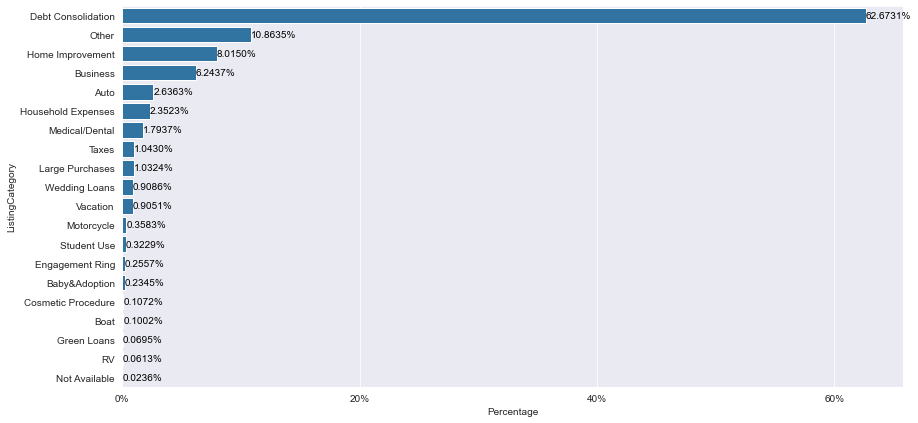

In [25]:
#here to adjust the plot size 
plt.figure(figsize = [14,7])

#First taking the order of ListingCategory and then plotting the count plot
Listing_order = loan_clean['ListingCategory'].value_counts().index
sb.countplot(data = loan_clean , y = 'ListingCategory', order = Listing_order , color = base_color_for_univariate)

#To adjust the the x ticks 
x_ticks = np.arange(0.0002, proportion[0] , 0.2)
x_labels = ['{:.0f}%'.format(i*100) for i in x_ticks]
plt.xticks(x_ticks * loan_clean.shape[0] , x_labels)
plt.xlabel('Percentage')

#To add percentage of each count 
count = 0
for i in loan_clean['ListingCategory'].value_counts():
    text = '{:0.4f}%'.format(i*100/loan_clean.shape[0])
    plt.text(i+1 , count ,text , va = 'center' ,color='black') 
    count += 1

#Finally showing the plot 
plt.show()

- After plotting each category type looks like that the most loans are for `Debt Consolidation` 
- `Green loans` , `RV` and `Not Available` loans have very small proportion 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- the count of the `ListingCategory` is unusual because their are very high count numbers with very low count          numbers so I transfered the frequency from absolute to relative just to picture the difference between them 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I changed the data regarding the `ListingCategory` column from numeric to strings to help me count the number of loans associated with each category 







## Bivariate Exploration

Here I'm going to look at the relation of two variables 
- The numeric variables associated with each loan status
- The relation between our numeric variabels  
- The monthly payments associated with loan amount

__First__:

I'm interested in only in three values of `loanStatus` column :__
1. Current 
2. Defaulted
3. Completed 

__NOTE__ : I selected these values before and stored it in `loan_clean_status

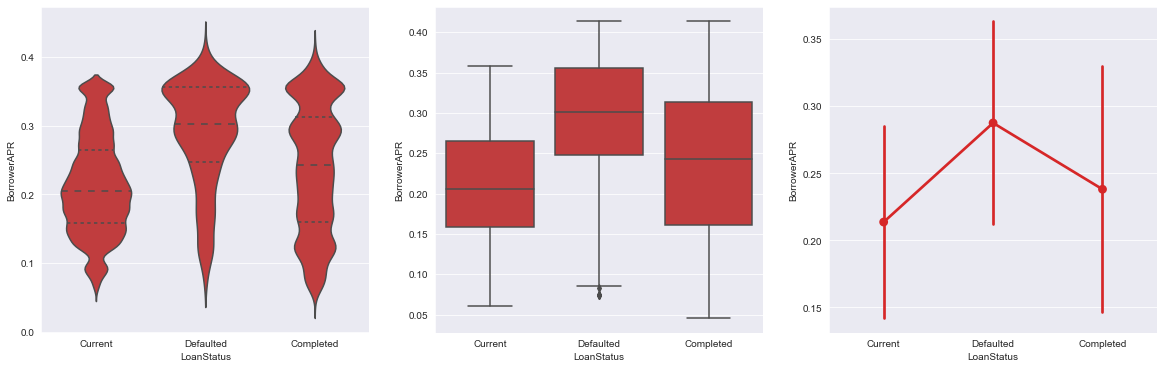

In [26]:
#Plotting APR with loan status

#To adjust the size of the plots
plt.figure(figsize = [20,6])

#Plot #1 violin
plt.subplot(1,3,1)
sb.violinplot(data = loan_clean_status , x = 'LoanStatus' , y = 'BorrowerAPR' , inner = 'quartile' ,
              color = base_color_for_bivariate)

#Plot #2 box
plt.subplot(1,3,2)
sb.boxplot(data = loan_clean_status , x = 'LoanStatus' , y = 'BorrowerAPR' ,
           color = base_color_for_bivariate)

#Plot #3 point
plt.subplot(1,3,3)
sb.pointplot(data = loan_clean_status , x = 'LoanStatus' , y = 'BorrowerAPR' , ci = 'sd' ,
           color = base_color_for_bivariate)
plt.show()

- Looks like the loans that are defaulted is because of the high APR 

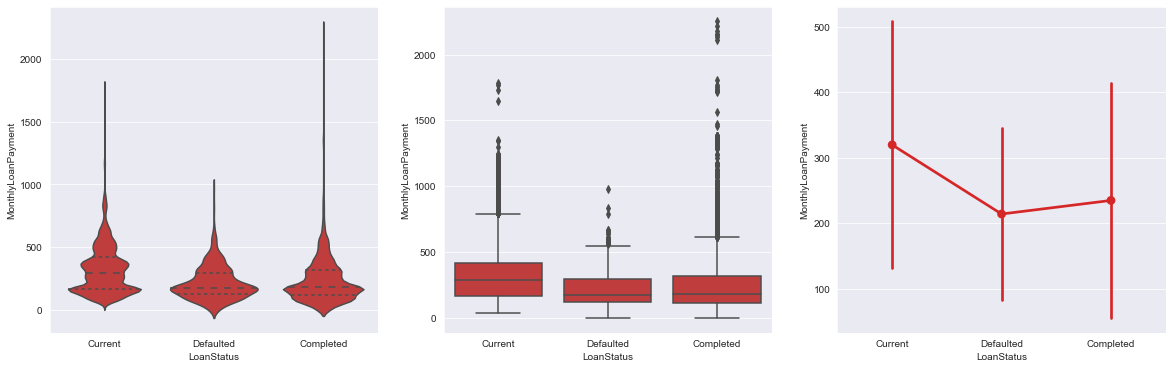

In [27]:
#Plotting Monthly Payments with loan status

#To adjust the size of the plots
plt.figure(figsize = [20,6])

#Plot #1 violin
plt.subplot(1,3,1)
sb.violinplot(data = loan_clean_status , x = 'LoanStatus' , y = 'MonthlyLoanPayment' , inner = 'quartile' ,
              color = base_color_for_bivariate)

#Plot #2 box
plt.subplot(1,3,2)
sb.boxplot(data = loan_clean_status , x = 'LoanStatus' , y = 'MonthlyLoanPayment' ,
           color = base_color_for_bivariate)

#Plot #3 point
plt.subplot(1,3,3)
sb.pointplot(data = loan_clean_status , x = 'LoanStatus' , y = 'MonthlyLoanPayment' , ci = 'sd' ,
           color = base_color_for_bivariate)
plt.show()

- The above plots suggests that most loans with low monthly payments are defaulted 
- there are so many outliers in `Current` , `Defaulted` and `Completed`

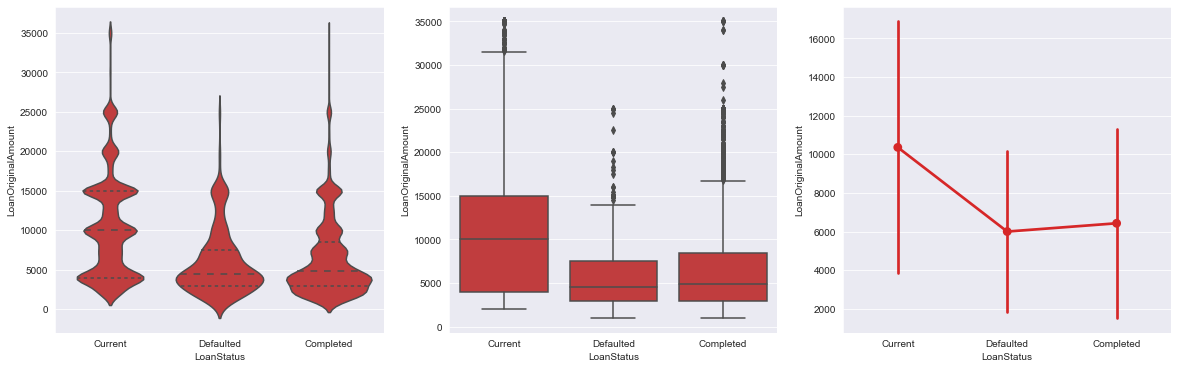

In [28]:
#Plotting Loan amount with loan status

#To adjust the size of the plots
plt.figure(figsize = [20,6])

#Plot #1 violin
plt.subplot(1,3,1)
sb.violinplot(data = loan_clean_status , x = 'LoanStatus' , y = 'LoanOriginalAmount' , inner = 'quartile' ,
              color = base_color_for_bivariate)

#Plot #2 box
plt.subplot(1,3,2)
sb.boxplot(data = loan_clean_status , x = 'LoanStatus' , y = 'LoanOriginalAmount' ,
           color = base_color_for_bivariate)

#Plot #3 point
plt.subplot(1,3,3)
sb.pointplot(data = loan_clean_status , x = 'LoanStatus' , y = 'LoanOriginalAmount' , ci = 'sd',
           color = base_color_for_bivariate)
plt.show()

- The above plots suggests that most loans with low amount are defaulted 

 __Second__:

Now let's look at the nature of our numeric variables__

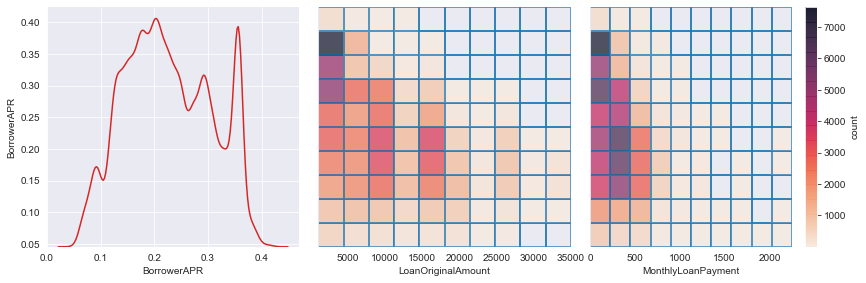

In [29]:
#Getting the minimum value of BorrowerAPR
min_value = loan_clean.BorrowerAPR.min() 

#Plot the matrix 
g = sb.PairGrid(data = loan_clean , x_vars = ['BorrowerAPR' , 'LoanOriginalAmount' , 'MonthlyLoanPayment' ] ,
                y_vars = 'BorrowerAPR'  , height = 4)

#Plotting kde on the matrix diagonal
g.map_diag(sb.kdeplot , color = base_color_for_bivariate  )

#Plotting a Heatmap outside the diagonal
g.map_offdiag(plt.hist2d , cmap = 'rocket_r' , alpha = 2/3 , cmin = min_value)

#Plotting the color bar
plt.colorbar(label = 'count')

plt.show()

- After seeing the nature of the `BorrowerAPR` with the rest of the numeric variables looks like that most APRs are between (0.15 and 0.25) 
- High amount of APR are associated with low amount of loan and low amount of monthly payments

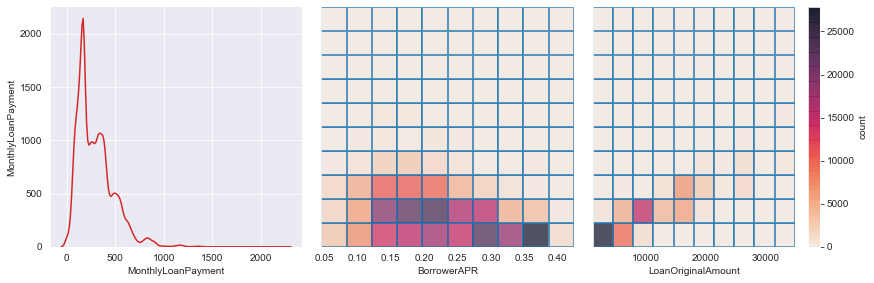

In [30]:
#Getting the minimum value of Monthly Loan Payment
min_value = loan_clean.MonthlyLoanPayment.min()

#Plot the matrix 
g = sb.PairGrid(data = loan_clean , x_vars = ['MonthlyLoanPayment' , 'BorrowerAPR' , 'LoanOriginalAmount' ] ,
                y_vars = 'MonthlyLoanPayment'  , height = 4)

#Plotting kde on the matrix diagonal
g.map_diag(sb.kdeplot , color = base_color_for_bivariate)
#Plotting a Heatmap outside the diagonal
g.map_offdiag(plt.hist2d , cmap = 'rocket_r' , alpha = 2/3 , cmin = min_value)

#Plotting the color bar
plt.colorbar(label = 'count')
plt.show()

- The above plots suggests that most monthly payments are between (300 to 400) and with low loan amount the low the monthly payment which is obvious

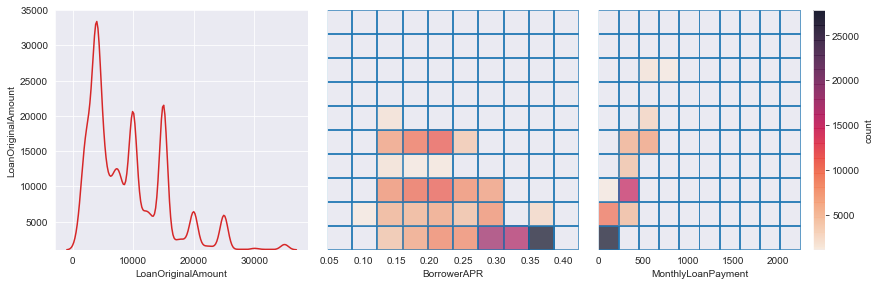

In [31]:
#Getting the minimum value of Loan Original Amount
min_value = loan_clean.LoanOriginalAmount.min()

#Plot the matrix
g = sb.PairGrid(data = loan_clean , x_vars = ['LoanOriginalAmount' , 'BorrowerAPR'  , 'MonthlyLoanPayment' ] ,
                y_vars = 'LoanOriginalAmount'  , height = 4)

#Plotting kde on the matrix diagonal
g.map_diag(sb.kdeplot , color = base_color_for_bivariate)

#Plotting a Heatmap outside the diagonal
g.map_offdiag(plt.hist2d , cmap = 'rocket_r' , alpha = 2/3 , cmin = min_value)

#Plotting the color bar
plt.colorbar(label = 'count')
plt.show()

- The above plots suggests that most people take loans between (3000 , 6000) and with higher the loan amount the higher monthly payments will be 

__Third__ :

lets look deep into the loan amount and the monthly payments

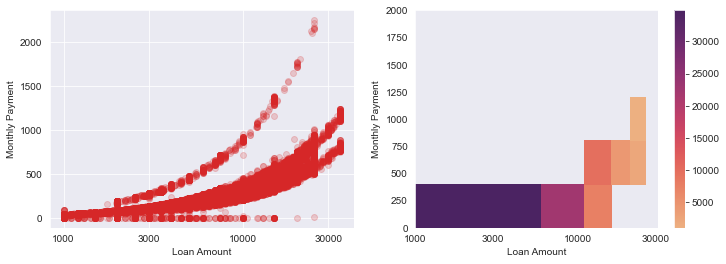

In [32]:
#Adjusting the figure size
plt.figure(figsize = [12,4])

#Plot #1 scatter
plt.subplot(1,2,1)

#plotting the scatter
plt.scatter(data = loan_clean , x = 'LoanOriginalAmount' , y = 'MonthlyLoanPayment' , alpha = 1/5 ,
            color = base_color_for_bivariate)

#Adjusting the x ticks
plt.xscale('log')
xticks = [1000 , 3000 , 10000 ,30000 ]
xlabels = ['{:1.0f}'.format(label) for label in xticks]
plt.xticks(xticks , xlabels)
plt.xlabel('Loan Amount')

#Labeling the y-axis
plt.ylabel('Monthly Payment')

#Plot #2 Heatmap
plt.subplot(1,2,2)

#Specifying the bins for the both x-axis and y-axis
bins_amount = np.arange(loan_clean.LoanOriginalAmount.min() , loan_clean.LoanOriginalAmount.max() , 5000)
bins_payment = np.arange(loan_clean.MonthlyLoanPayment.min() , loan_clean.MonthlyLoanPayment.max() , 400)

#Plotting the heatmap
heatmap = plt.hist2d(data = loan_clean ,  x = 'LoanOriginalAmount' , y = 'MonthlyLoanPayment' ,
           cmap = 'flare'  , cmin = 1000 , bins = [bins_amount , bins_payment])

#Plotting the color bar
plt.colorbar()

#Adjusting the x-axis
plt.xscale('log')
xticks = [1000 , 3000 , 10000 ,30000 ]
xlabels = ['{:1.0f}'.format(label) for label in xticks]
plt.xticks(xticks , xlabels)
plt.xlabel('Loan Amount')

#Labeling the y-axis
plt.ylabel('Monthly Payment')

plt.show()

- Looks like that the relation between large amount of loans with monthly payments are very strong and have strong positive correlation
- Yet there are some loans with high amount and low monthly payments a guess these are long-term loans 


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Looks like that loans that are defaulted are because of the high APR 
- Most loans with low amount are defaulted
- Most loans with low monthly payments are defaulted
- With the high amount of loans the high monthly payments will be 
- High APR are associated with low amount of loans and low amount of monthly payments

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I observed that high amount of APR are related to low amount of loans and monthly payments as well which is interesting 

## Multivariate Exploration

Here I'm going to look at the previous variables and it relation with the Listing category since our main focus is the listing category

1. First I'm going to look at the loan amount and monthly payments associated with the top 10 ListingCategory
2. Second I'm going to look at the LoanStatus and APR associated with the top 10 ListingCtaegory

__First__:

let's look at the loan amount and it's monthly payment with the top 10 listing categories

In [33]:
#Selecting the top 10 listing categories
categories = loan_clean.ListingCategory.value_counts().index[:10]

#Adding the selected categories with the previous loan_clean_status
loan_clean_categories = loan_clean_status.loc[loan_clean_status.ListingCategory.isin(categories)]

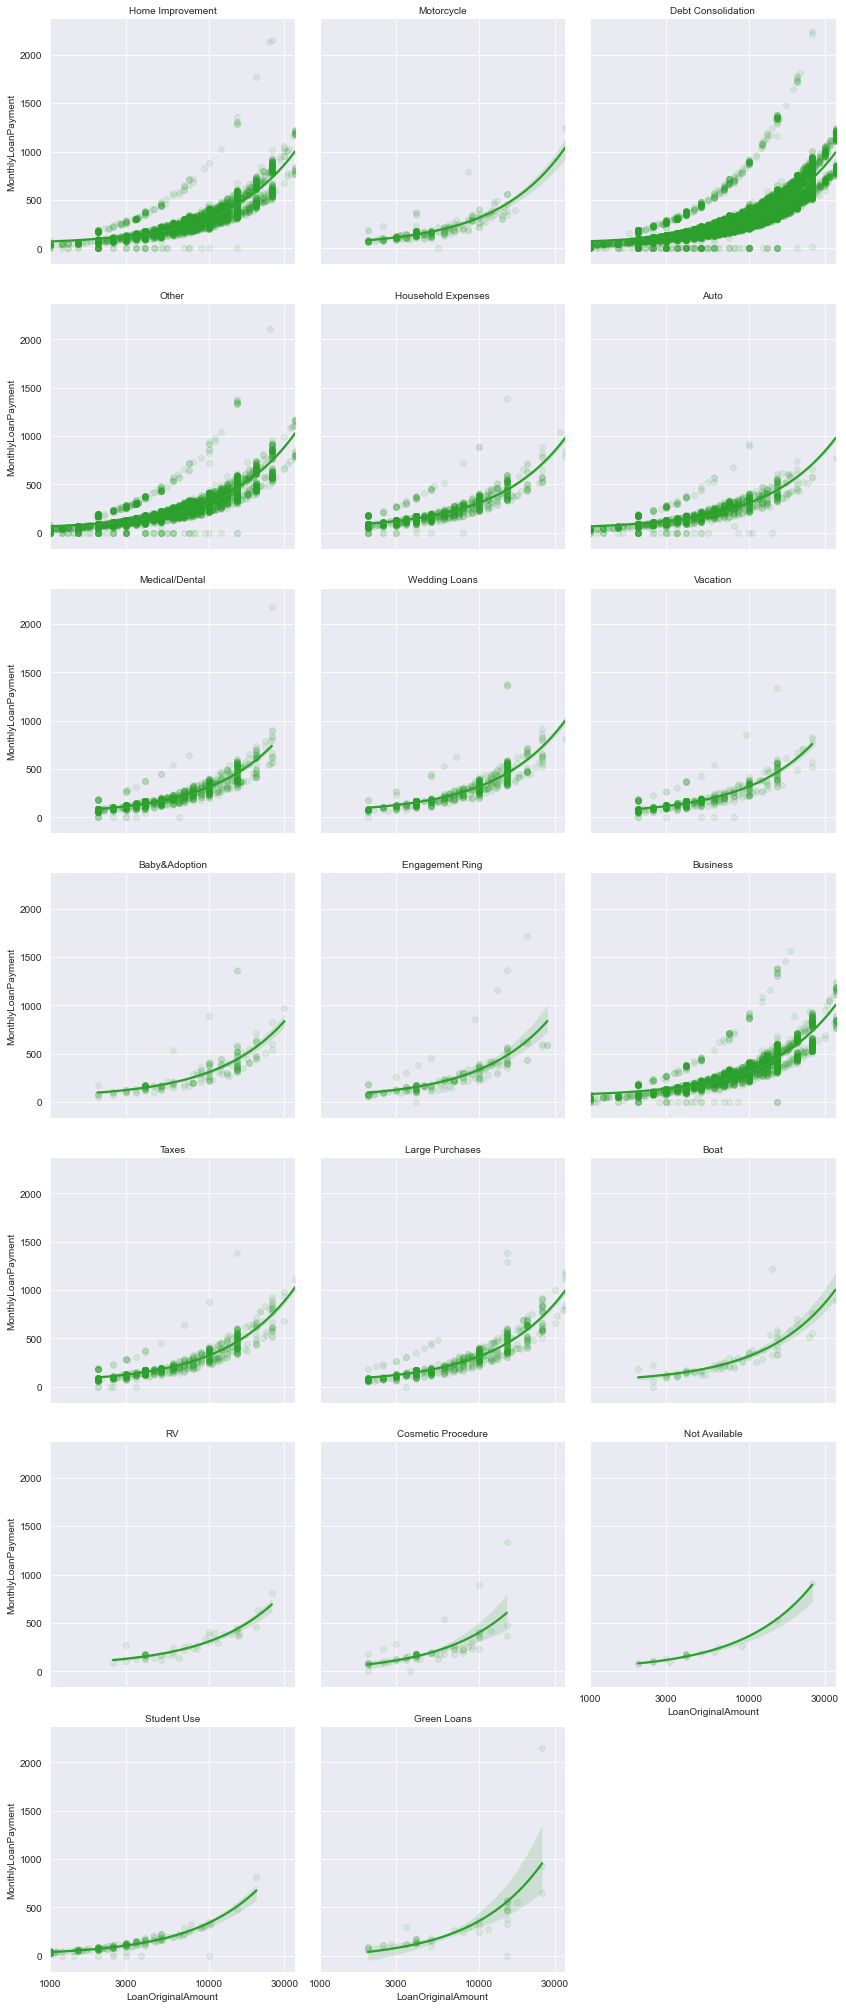

In [34]:
#Setting the top 10 categories plots
fig = sb.FacetGrid(data = loan_clean_status , col = 'ListingCategory' , col_wrap = 3 , height = 4)

#Plotting scatter on the top 10 listing categories
fig.map(sb.regplot , 'LoanOriginalAmount' , 'MonthlyLoanPayment' ,
      color = base_color_for_mutlivariate ,scatter_kws = {'alpha':1/10} , x_jitter = .3)

#Adjusting the x ticks 
fig.set(xscale = 'log')
xticks = [1000 , 3000 , 10000 , 30000]
fig.set(xticks = xticks , xticklabels = xticks)

#Adjusting the titles 
fig.set_titles('{col_name}')
plt.show()

- As disscussed in the bivariate exploration that with high loan amount the monthly payments will increase and in the above plot I focused on the top 10 listing categories to see each loan category with its LoanOriginalAmount and Monthly payments

__Second__:

Now let's look at the Loan status and the APR for the top 10 listing categories

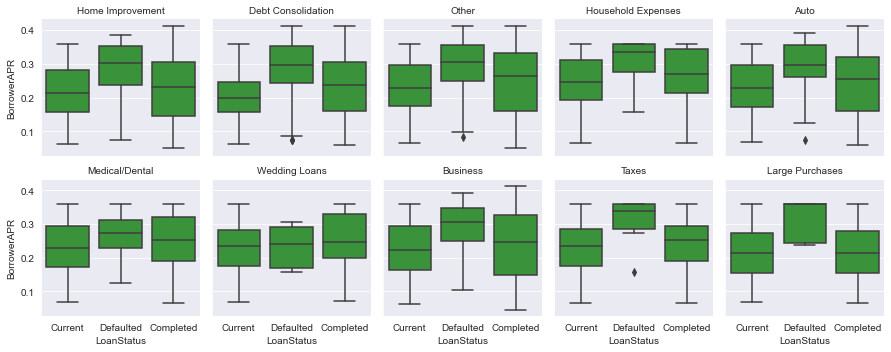

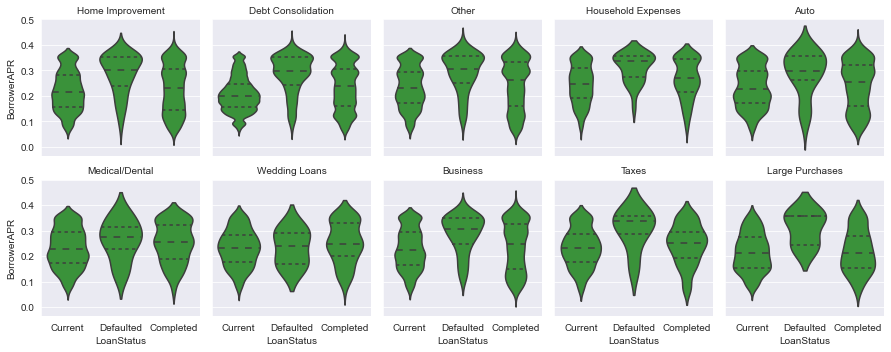

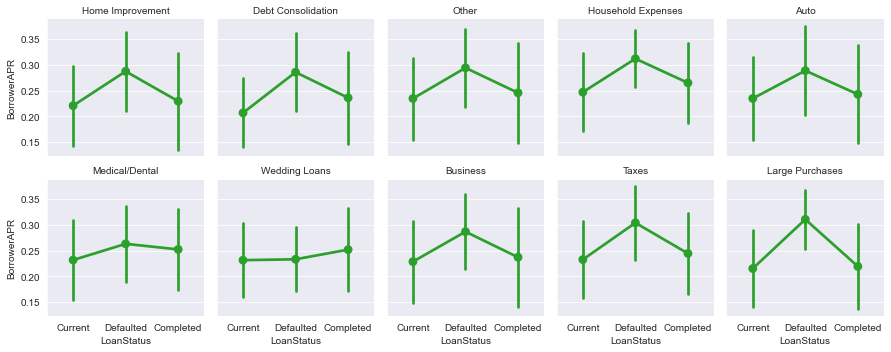

In [35]:
#Ordering status values
ordered_status = ['Current' , 'Defaulted' , 'Completed']

#Plot #1 box 
fig1 = sb.FacetGrid(data = loan_clean_categories , col = 'ListingCategory' ,
                    col_wrap = 5 , height = 2.5)
fig1.map(sb.boxplot , 'LoanStatus' , 'BorrowerAPR' , order = ordered_status ,
         color = base_color_for_mutlivariate )
fig1.set_titles('{col_name}')

#Plot #2 violing
fig2 = sb.FacetGrid(data = loan_clean_categories , col = 'ListingCategory' ,
                    col_wrap = 5 , height = 2.5)
fig2.map(sb.violinplot , 'LoanStatus' , 'BorrowerAPR' , order = ordered_status ,
         inner = 'quartile' , color = base_color_for_mutlivariate)
fig2.set_titles('{col_name}')

#Plot #3 point 
fig3 = sb.FacetGrid(data = loan_clean_categories , col = 'ListingCategory' ,
                    col_wrap = 5 , height = 2.5)
fig3.map(sb.pointplot , 'LoanStatus' , 'BorrowerAPR' , order = ordered_status ,
         color = base_color_for_mutlivariate , ci = 'sd')
fig3.set_titles('{col_name}')

plt.show()

- In the above plots I focused on plotting 3 different types of plots to get the accurate cause of loans that are defaulted and it seems to be because of the high APR as disscused before 
- `Large Purchases` loan are the most loans that are defaulted  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- In the first plots I noticed that with the high loan amount the high monthly payments will be and this strengthend my analysis in the bivariate exploration 
- In the second plots I noticed that nearly all loan are defaulted becauase of the high APR and there are some outliers in the defaulted loans for `Debt Consolidation` , `Other` ,`Auto` and `Taxes`

### Were there any interesting or surprising interactions between features?

- I found that nearly all loan are defaulted because of the high APR except the `Wedding Loans` which makes it interseting like people who take wedding loans are some kind commited to it than other loans 
- After looking at the features of interests from the Univariate to Multivariate exploration it seems that the relations match and by looking at each loan category I have figured what is the cause of defaulted loans 